In [1]:
#Impoting the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_profiling as pp
import pickle as pk
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

C:\Users\hi\Anaconda3\lib\site-packages\pandas_profiling\plot.py:15: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "C:\Users\hi\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\hi\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\hi\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\hi\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\hi\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 486, in start
    self.io_loop.start()
  File "C:\Users\hi\Anaconda3\lib\site

In [2]:
models = []
acc = []
precision = []
recall = []
f1 = []

In [3]:
# Importing the dataset
dataset = pd.read_csv('data.csv')
dataset.head()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [4]:
dataset.shape

(2017, 17)

In [5]:
dataset.drop('Unnamed: 0',axis=1,inplace=True)

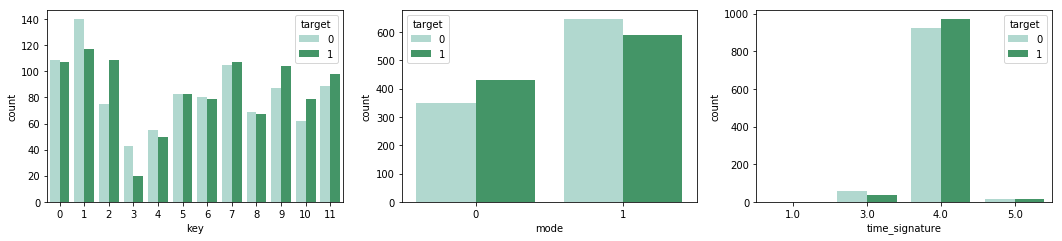

In [6]:
fig1 = plt.figure(figsize=(18, 12))

ax1 = fig1.add_subplot(331)
sns.countplot(x='key',hue='target',data=dataset, palette='BuGn')

ax2 = fig1.add_subplot(332)
sns.countplot(x='mode',hue='target',data=dataset, palette='BuGn')

ax3 = fig1.add_subplot(333)
sns.countplot(x='time_signature',hue='target',data=dataset, palette='BuGn')

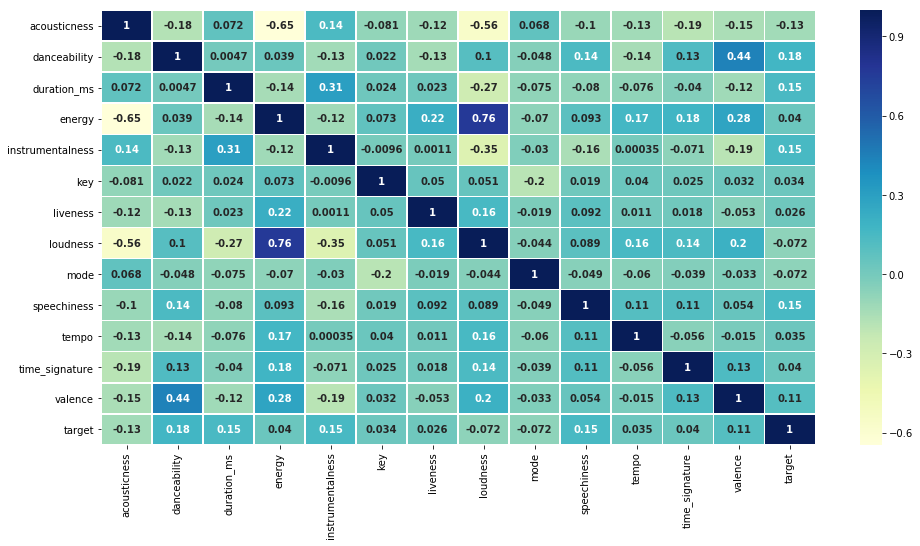

In [7]:
fig2 = plt.figure(figsize=(16, 8))
sns.heatmap(dataset.corr(), annot=True, annot_kws={'weight':'bold'},linewidths=.5, cmap='YlGnBu')

In [8]:
pp.ProfileReport(dataset)

Number of variables,16
Number of observations,2017
Total Missing (%),0.0%
Total size in memory,252.2 KiB
Average record size in memory,128.0 B
Numeric,12
Categorical,2
Boolean,2
Date,0
Text (Unique),0
Rejected,0


In [9]:
dataset.isnull().sum()

acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
target              0
song_title          0
artist              0
dtype: int64

In [10]:
X = dataset.drop('target',axis=1)
y = dataset['target']
print(X.shape,type(X))
print(y.shape,type(y))

(2017, 15) <class 'pandas.core.frame.DataFrame'>
(2017,) <class 'pandas.core.series.Series'>


In [11]:
X.drop('song_title',inplace=True,axis=1)

In [12]:
#Encoding for artist
import category_encoders as ce
artist_encoder = ce.BinaryEncoder(cols=['artist'])
X = artist_encoder.fit_transform(X)

In [13]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, 
                                                    random_state = 0)

In [14]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [15]:
print(X_train.shape,len(X_train),type(X_train))
print(y_train.shape,len(y_train),type(y_train))

(1512, 25) 1512 <class 'numpy.ndarray'>
(1512,) 1512 <class 'pandas.core.series.Series'>


## Logistic Regression 

In [16]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = 0)
lr.fit(X_train, y_train)
models.append('Logistic Regression')

In [17]:
#Save the model on disk
pk.dump(lr, open('logistic_regression.sav','wb'))

In [18]:
lr.coef_

array([[ 4.11010201e-03,  2.60201424e-01, -2.97263646e-03,
         2.84431758e-01,  5.95834367e-01, -2.65548340e-02,
         1.57049678e-02, -8.14425856e-01, -8.05968439e-02,
         1.61822696e-01,  2.20527688e-01, -1.55303265e-01,
         3.05510947e-01,  0.00000000e+00, -4.81245731e+00,
        -2.23109831e+00, -1.01890260e+00, -7.70448969e-01,
        -2.14279264e-01, -3.25348561e-01,  1.76664768e-01,
         5.91373121e-02, -2.29707448e-02, -8.07032796e-02,
         5.50388904e-02]])

In [19]:
lr.intercept_

array([-0.48786391])

In [20]:
lr.n_iter_

array([7], dtype=int32)

In [21]:
lr.predict(X_test)

array([1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,

In [22]:
probs = lr.predict_proba(X_test)

In [23]:
#Load Model to predict
loaded_model_lr = pk.load(open('logistic_regression.sav', 'rb'))

## Decision Trees

In [24]:
# Fitting Decision Tree Classification to the Training set
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion = 'entropy', 
                                    random_state = 0)
dtree.fit(X_train, y_train)
models.append('Decision Trees')

C:\Users\hi\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


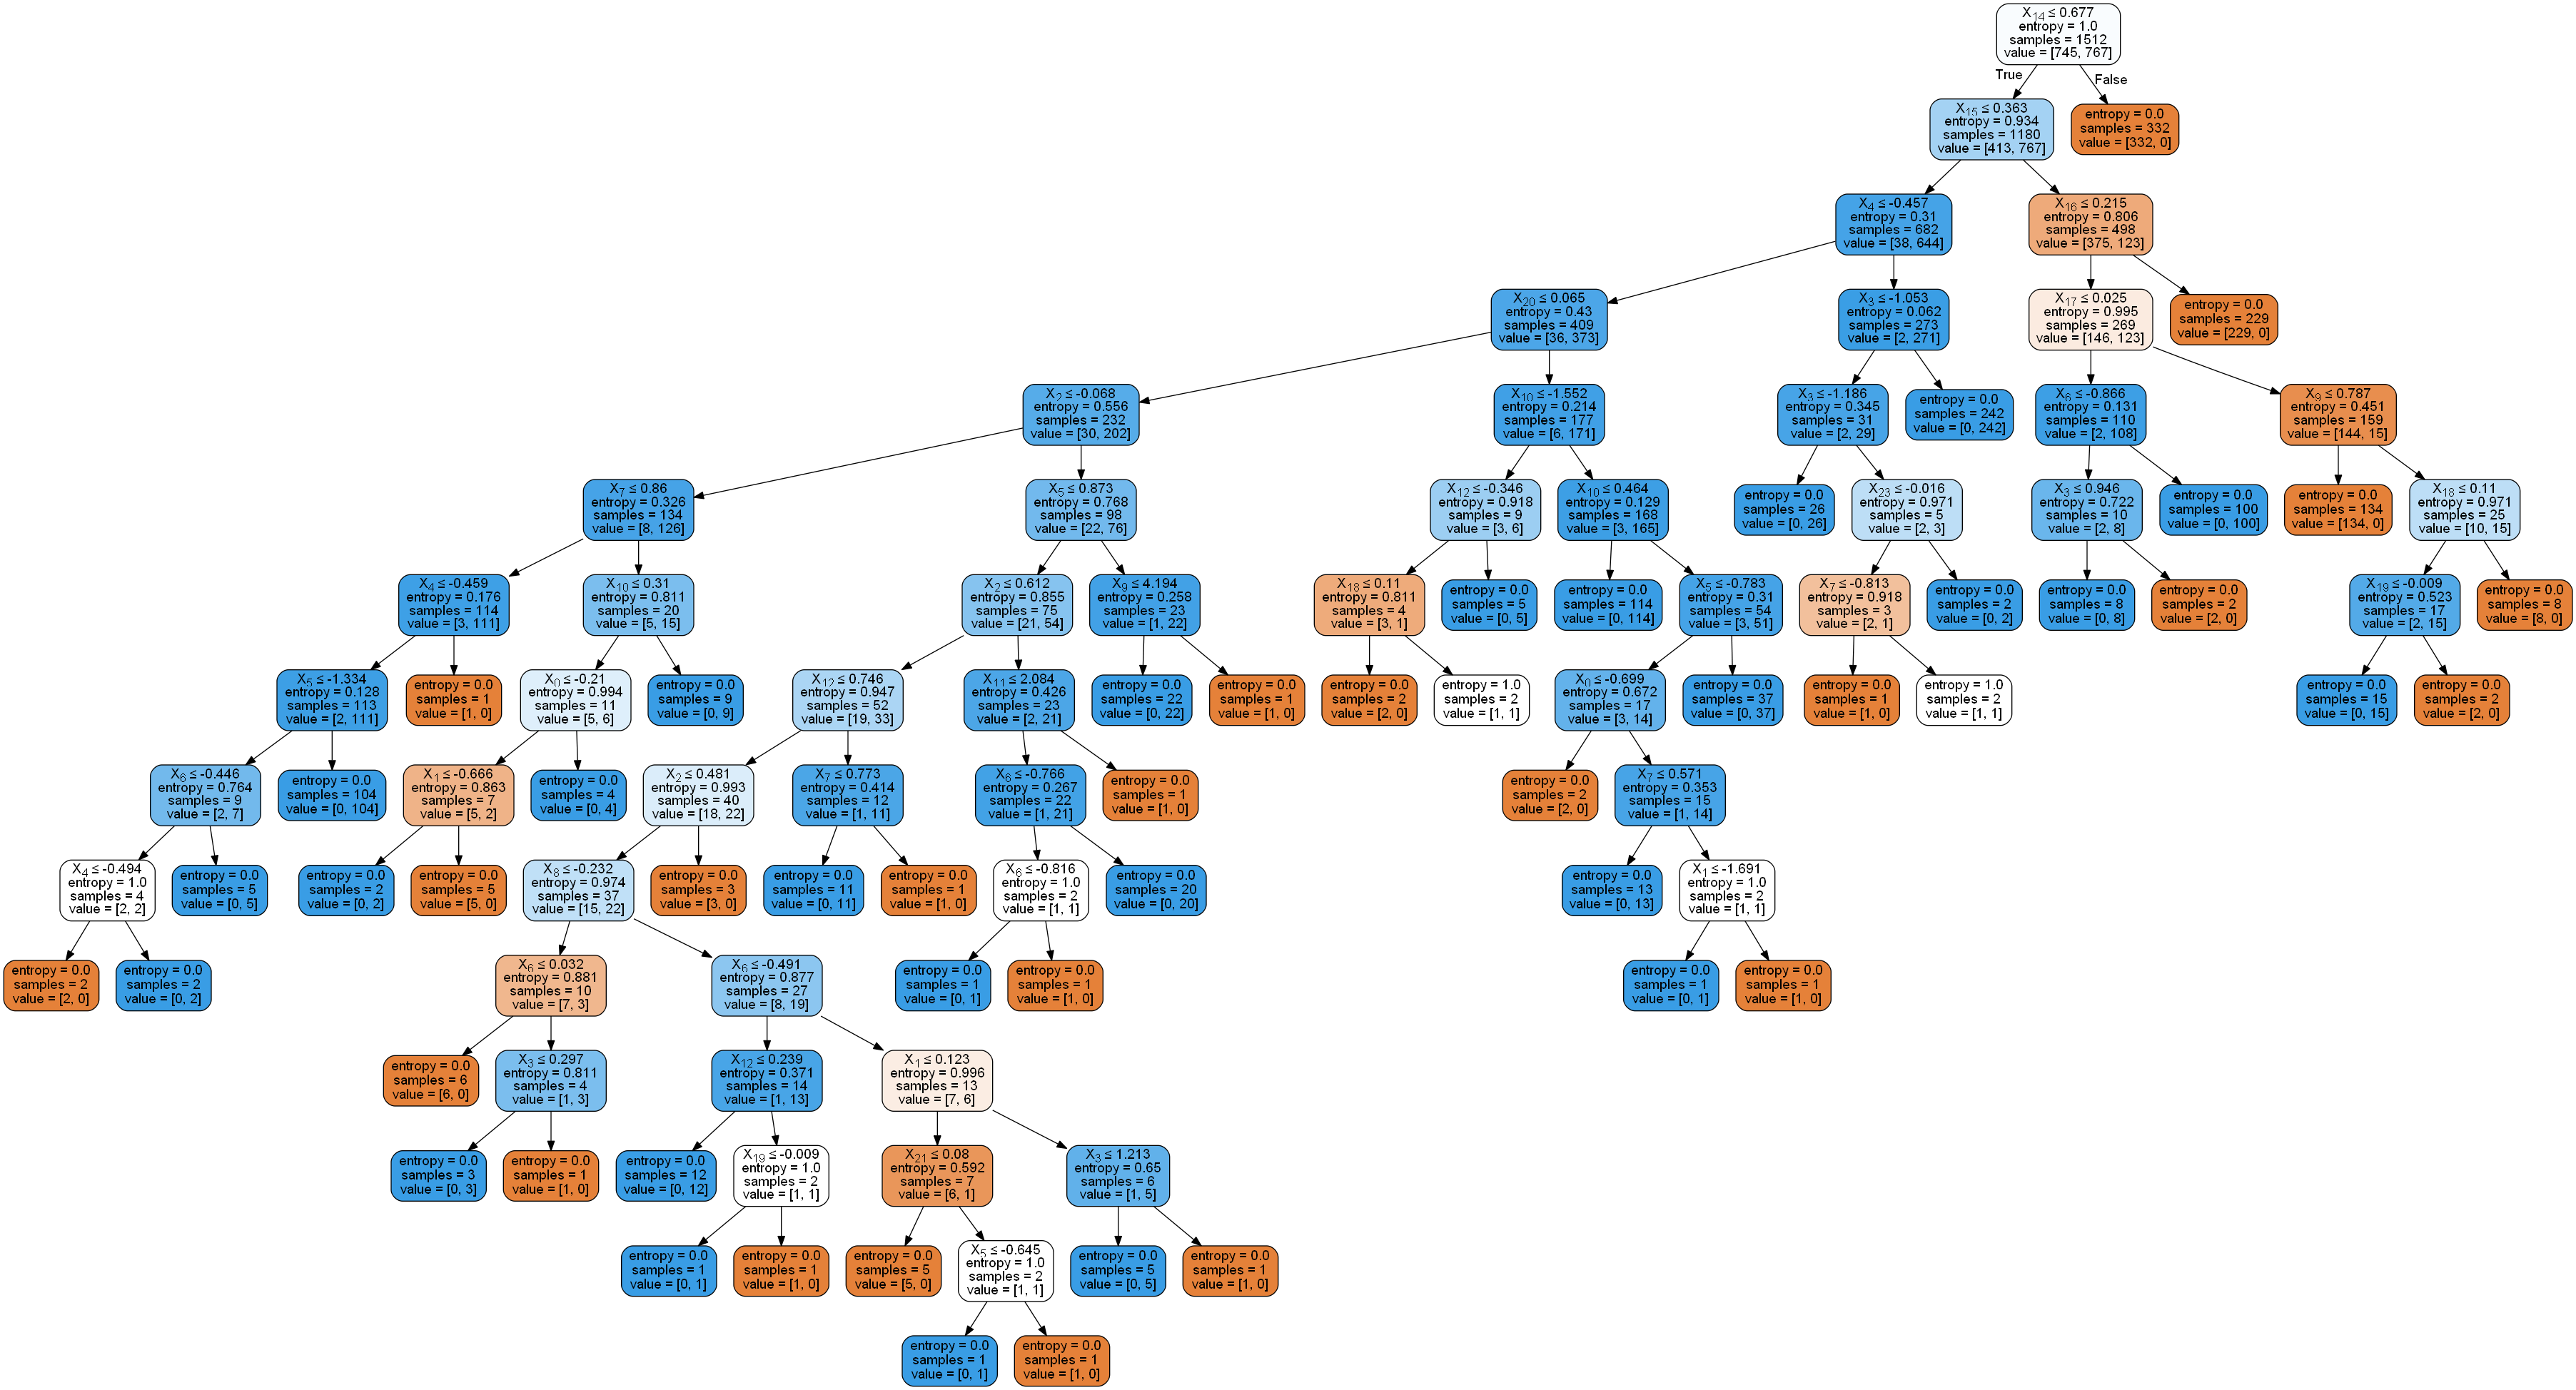

In [25]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

## SVM 

In [26]:
# Fitting SVM to the Training set
from sklearn.svm import SVC
svc = SVC(kernel = 'rbf', random_state = 0)
svc.fit(X_train, y_train)
models.append('SVM')

## Random Forest Classifier 

In [27]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 350, criterion = 'entropy', 
                                    random_state = 0)
rf.fit(X_train, y_train)
models.append('Random Forest')

## Adaboost 

In [28]:
# Fitting AdaBoost Classification to the Training set
from sklearn.ensemble import AdaBoostClassifier
adb = AdaBoostClassifier(base_estimator=dtree, n_estimators=50, 
                         algorithm='SAMME.R', random_state=40)
adb.fit(X_train, y_train)
models.append('AdaBoost')

## Average Ensemble 

In [29]:
# Fitting Voting Classifier Classification to the Training set
from sklearn.ensemble import VotingClassifier
vc = VotingClassifier(estimators=[('Logistic Regression',lr),
                                   ('SVM',svc),
                                   ('Decision Tree',dtree),
                                   ('Random Forest',rf),
                                   ('AdaBoost',adb)], 
                       voting='hard')
                       #flatten_transform=True)
vc.fit(X_train, y_train)
models.append('Average Ensemble')

In [30]:
# Fitting Voting Classifier Classification to the Training set
from sklearn.ensemble import VotingClassifier
vc2 = VotingClassifier(estimators=[('Logistic Regression',lr),
                                   ('SVM',svc),
                                   ('Decision Tree',dtree),
                                   ('Random Forest',rf),
                                   ('AdaBoost',adb)],
                      voting='soft',
                      flatten_transform=True, 
                      weights=[1,5,2,4,3])
vc2.fit(X_train, y_train)

VotingClassifier(estimators=[('Logistic Regression',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='warn',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=0, solver='warn',
                                                 tol=0.0001, verbose=0,
                                                 warm_start=False)),
                             ('SVM',
                              SVC(C=1.0, cache_size=200, class_weight=None,
                                  coef0=0.0, decisi...
                                                                                       criterion='entropy',
 

### Evaluation through Confusion Matrix
 

In [31]:
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score, 
                             recall_score, f1_score)

In [32]:
print('Confusion Matrix for LR: \n',confusion_matrix(y_test, lr.predict(X_test)))
print('Accuracy for LR: \n',accuracy_score(y_test, lr.predict(X_test)))
acc.append(accuracy_score(y_test, lr.predict(X_test)))
print('Precision for LR: \n',precision_score(y_test, lr.predict(X_test)))
precision.append(precision_score(y_test, lr.predict(X_test)))
print('Recall for LR: \n',recall_score(y_test, lr.predict(X_test)))
recall.append(recall_score(y_test, lr.predict(X_test)))
print('f1_score for LR: \n',f1_score(y_test, lr.predict(X_test)))
f1.append(f1_score(y_test, lr.predict(X_test)))

Confusion Matrix for LR: 
 [[244   8]
 [ 10 243]]
Accuracy for LR: 
 0.9643564356435643
Precision for LR: 
 0.9681274900398407
Recall for LR: 
 0.9604743083003953
f1_score for LR: 
 0.9642857142857143


In [33]:
print('Confusion Matrix for DTrees: \n',confusion_matrix(y_test, dtree.predict(X_test)))
print('Accuracy for DTrees: \n',accuracy_score(y_test, dtree.predict(X_test)))
acc.append(accuracy_score(y_test, dtree.predict(X_test)))
print('Precision for DTrees: \n',precision_score(y_test, dtree.predict(X_test)))
precision.append(precision_score(y_test, dtree.predict(X_test)))
print('Recall for DTrees: \n',recall_score(y_test, dtree.predict(X_test)))
recall.append(recall_score(y_test, dtree.predict(X_test)))
print('f1_score for DTrees: \n',f1_score(y_test, dtree.predict(X_test)))
f1.append(f1_score(y_test, dtree.predict(X_test)))

Confusion Matrix for DTrees: 
 [[245   7]
 [ 12 241]]
Accuracy for DTrees: 
 0.9623762376237623
Precision for DTrees: 
 0.9717741935483871
Recall for DTrees: 
 0.9525691699604744
f1_score for DTrees: 
 0.9620758483033931


In [34]:
print('Confusion Matrix for SVM: \n',confusion_matrix(y_test, svc.predict(X_test)))
print('Accuracy for SVM: \n',accuracy_score(y_test, svc.predict(X_test)))
acc.append(accuracy_score(y_test, svc.predict(X_test)))
print('Precision for SVM: \n',precision_score(y_test, svc.predict(X_test)))
precision.append(precision_score(y_test, svc.predict(X_test)))
print('Recall for SVM: \n',recall_score(y_test, svc.predict(X_test)))
recall.append(recall_score(y_test, svc.predict(X_test)))
print('f1_score for SVM: \n',f1_score(y_test, svc.predict(X_test)))
f1.append(f1_score(y_test, svc.predict(X_test)))

Confusion Matrix for SVM: 
 [[244   8]
 [  3 250]]
Accuracy for SVM: 
 0.9782178217821782
Precision for SVM: 
 0.9689922480620154
Recall for SVM: 
 0.9881422924901185
f1_score for SVM: 
 0.9784735812133072


In [35]:
print('Confusion Matrix for RF: \n',confusion_matrix(y_test, rf.predict(X_test)))
print('Accuracy for RF: \n',accuracy_score(y_test, rf.predict(X_test)))
acc.append(accuracy_score(y_test, rf.predict(X_test)))
print('Precision for RF: \n',precision_score(y_test, rf.predict(X_test)))
precision.append(precision_score(y_test, rf.predict(X_test)))
print('Recall for RF: \n',recall_score(y_test, rf.predict(X_test)))
recall.append(recall_score(y_test, rf.predict(X_test)))
print('f1_score for RF: \n',f1_score(y_test, rf.predict(X_test)))
f1.append(f1_score(y_test, rf.predict(X_test)))

Confusion Matrix for RF: 
 [[246   6]
 [  3 250]]
Accuracy for RF: 
 0.9821782178217822
Precision for RF: 
 0.9765625
Recall for RF: 
 0.9881422924901185
f1_score for RF: 
 0.9823182711198427


In [36]:
print('Confusion Matrix for ADB: \n',confusion_matrix(y_test, adb.predict(X_test)))
print('Accuracy for ADB: \n',accuracy_score(y_test, adb.predict(X_test)))
acc.append(accuracy_score(y_test, adb.predict(X_test)))
print('Precision for ADB: \n',precision_score(y_test, adb.predict(X_test)))
precision.append(precision_score(y_test, adb.predict(X_test)))
print('Recall for ADB: \n',recall_score(y_test, adb.predict(X_test)))
recall.append(recall_score(y_test, adb.predict(X_test)))
print('f1_score for ADB: \n',f1_score(y_test, adb.predict(X_test)))
f1.append(f1_score(y_test, adb.predict(X_test)))

Confusion Matrix for ADB: 
 [[246   6]
 [ 11 242]]
Accuracy for ADB: 
 0.9663366336633663
Precision for ADB: 
 0.9758064516129032
Recall for ADB: 
 0.9565217391304348
f1_score for ADB: 
 0.9660678642714571


In [37]:
print('Confusion Matrix for VC: \n',confusion_matrix(y_test, vc.predict(X_test)))
print('Accuracy for VC: \n',accuracy_score(y_test, vc.predict(X_test)))
acc.append(accuracy_score(y_test, vc.predict(X_test)))
print('Precision for VC: \n',precision_score(y_test, vc.predict(X_test)))
precision.append(precision_score(y_test, vc.predict(X_test)))
print('Recall for VC: \n',recall_score(y_test, vc.predict(X_test)))
recall.append(recall_score(y_test, vc.predict(X_test)))
print('f1_score for VC: \n',f1_score(y_test, vc.predict(X_test)))
f1.append(f1_score(y_test, vc.predict(X_test)))

Confusion Matrix for VC: 
 [[245   7]
 [  3 250]]
Accuracy for VC: 
 0.9801980198019802
Precision for VC: 
 0.9727626459143969
Recall for VC: 
 0.9881422924901185
f1_score for VC: 
 0.9803921568627451


In [38]:
model_dict = {'Models': models,
             'Accuracies': acc,
             'Precision': precision,
             'Recall': recall,
             'f1-score': f1}

In [39]:
model_df = pd.DataFrame(model_dict)
model_df

,Models,Accuracies,Precision,Recall,f1-score
0,Logistic Regression,0.964356,0.968127,0.960474,0.964286
1,Decision Trees,0.962376,0.971774,0.952569,0.962076
2,SVM,0.978218,0.968992,0.988142,0.978474
3,Random Forest,0.982178,0.976562,0.988142,0.982318
4,AdaBoost,0.966337,0.975806,0.956522,0.966068
5,Average Ensemble,0.980198,0.972763,0.988142,0.980392


In [40]:
model_df = model_df.sort_values(['Accuracies', 'f1-score', 'Recall', 'Precision'],
                               ascending=False)

In [41]:
model_df

,Models,Accuracies,Precision,Recall,f1-score
3,Random Forest,0.982178,0.976562,0.988142,0.982318
5,Average Ensemble,0.980198,0.972763,0.988142,0.980392
2,SVM,0.978218,0.968992,0.988142,0.978474
4,AdaBoost,0.966337,0.975806,0.956522,0.966068
0,Logistic Regression,0.964356,0.968127,0.960474,0.964286
1,Decision Trees,0.962376,0.971774,0.952569,0.962076


## Hyperparameter Tuning 

In [42]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = lr, 
                             X = X_train, 
                             y = y_train, 
                             cv = 10)
acMean = accuracies.mean()
acStd = accuracies.std()

In [43]:
acMean

0.947653886371558

In [44]:
acStd

0.02229717759348352

In [45]:
accuracies

array([0.93421053, 0.95394737, 0.97368421, 0.96052632, 0.98026316,
       0.9602649 , 0.95364238, 0.93333333, 0.92      , 0.90666667])

In [46]:
# Applying Grid Search to find the best model and the best parameters
from sklearn.model_selection import GridSearchCV
parameters = {"n_estimators": [100, 200, 300],
              "criterion":['gini','entropy'],
              "max_depth": [8, 16, 32],
              "min_samples_split": [10, 20, 30],
              "min_samples_leaf": [1, 5, 15],
              "min_weight_fraction_leaf": [0.1, 0.05, 0.005]}
grid_search = GridSearchCV(estimator = rf,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
best_accuracy = grid_search.best_score_

In [ ]:
best_accuracy

In [ ]:
best_parameters = grid_search.best_params_

In [ ]:
best_parameters

In [ ]:
# Fitting Final Model on training set
from sklearn.ensemble import RandomForestClassifier
tunedRF = RandomForestClassifier(n_estimators = best_parameters["n_estimators"],
                                 criterion = best_parameters["criterion"],
                                 max_depth = best_parameters["max_depth"],
                                 min_samples_split = best_parameters["min_samples_split"],
                                 min_samples_leaf = best_parameters["min_samples_leaf"],
                                 min_weight_fraction_leaf = best_parameters["min_weight_fraction_leaf"])
tunedRF.fit(X_train, y_train)

In [ ]:
print('Confusion Matrix for Tuned RF: \n',confusion_matrix(y_test, tunedRF.predict(X_test)))
print('Accuracy for Tuned RF: \n',accuracy_score(y_test, tunedRF.predict(X_test)))
acc.append(accuracy_score(y_test, tunedRF.predict(X_test)))
print('Precision for Tuned RF: \n',precision_score(y_test, tunedRF.predict(X_test)))
precision.append(precision_score(y_test, tunedRF.predict(X_test)))
print('Recall for Tuned RF: \n',recall_score(y_test, tunedRF.predict(X_test)))
recall.append(recall_score(y_test, tunedRF.predict(X_test)))
print('f1_score for Tuned RF: \n',f1_score(y_test, tunedRF.predict(X_test)))
f1.append(f1_score(y_test, tunedRF.predict(X_test)))